In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score, precision_score, recall_score, classification_report

In [32]:
df = pd.read_csv(r'news.csv', low_memory=False)
df = df.iloc[:,0:4]

In [33]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"” Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [34]:
df.shape

(7818, 4)

In [35]:
#checking for null values
df.isnull().any()

Unnamed: 0    True
title         True
text          True
label         True
dtype: bool

In [36]:
#dropping all columns with null values
df = df.dropna()
df.shape

(6753, 4)

In [37]:
df.isna().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

In [38]:
df.label.unique()

array(['FAKE', 'REAL', ' filled with fear and insecurity',
       ' by criminal and congressional investigations',
       ' however intimidating the process and long the lines. For Americans who may feel unmoved or unwilling to vote for Mrs. Clinton',
       ' and who better to do it than an outsider beholden to neither political party? If only that reform possibility didnâ€™t arrive as a flawed personality who has few convictions and knows little about the world.â€\x9d',
       ' Hugh Naylor writes. And the impending assault represents an â€œintensified international effortâ€\x9d to increase pressure on the extremist group as it loses control of territory in the countries.',
       ' Wesley Lowery and Steven Rich)',
       ' clap and whoop as [KrisAnne] Hall takes the stage in the ballroom of a suburban Minnesota hotel â€¦ Hall',
       ' higher spending by the state and wide-scale efforts to lift the working poor. â€¦ It is on the ballot in three states: Californians are set to essen

In [39]:
#selecting rows which have labels as REAL / FAKE only
df = df[df['label'].isin(['REAL','FAKE'])]

In [40]:
df.shape

(6314, 4)

In [41]:
#All labels are now only REAL/FAKE
df.label.unique()

array(['FAKE', 'REAL'], dtype=object)

In [42]:
#Getting the labels
labels = df.label

In [43]:
#splitting the dataset into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df['text'],labels,test_size=0.2,random_state=1)

In [44]:
#Initializing a tfidfvectorizer with stop words from English Language and a max document frequency of 0.7
#We will then fit and transform the vectorizer on the train set and transform the vectorizer on the test set
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

X_train = tfidf_vectorizer.fit_transform(X_train) 
X_test = tfidf_vectorizer.transform(X_test)

In [46]:
#we’ll initialize a PassiveAggressiveClassifier. 

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train,Y_train)

Y_Pred = pac.predict(X_test)
Y_Pred

array(['FAKE', 'FAKE', 'FAKE', ..., 'FAKE', 'FAKE', 'REAL'], dtype='<U4')

In [47]:
accuracy = accuracy_score(Y_test,Y_Pred)
print(accuracy)

0.9501187648456056


In [48]:
#Plotting the confusionmatrix
cm = confusion_matrix(Y_test,Y_Pred, labels=['FAKE','REAL'])
cm

array([[594,  25],
       [ 38, 606]], dtype=int64)

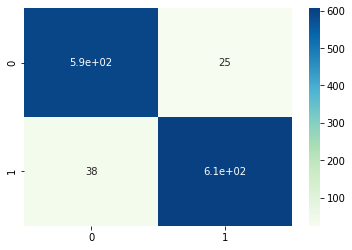

In [49]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap = 'GnBu')

In [50]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_Pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.96      0.95       619
        REAL       0.96      0.94      0.95       644

    accuracy                           0.95      1263
   macro avg       0.95      0.95      0.95      1263
weighted avg       0.95      0.95      0.95      1263

